# Handwritten digits classification using neural network

# Introduction

The data files contain gray-scale images of hand-drawn digits, from zero through nine.

 - Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
 - Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. 
 - This pixel-value is an integer between 0 and 255, inclusive.

# Problem-Statement
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

## ANN - NN

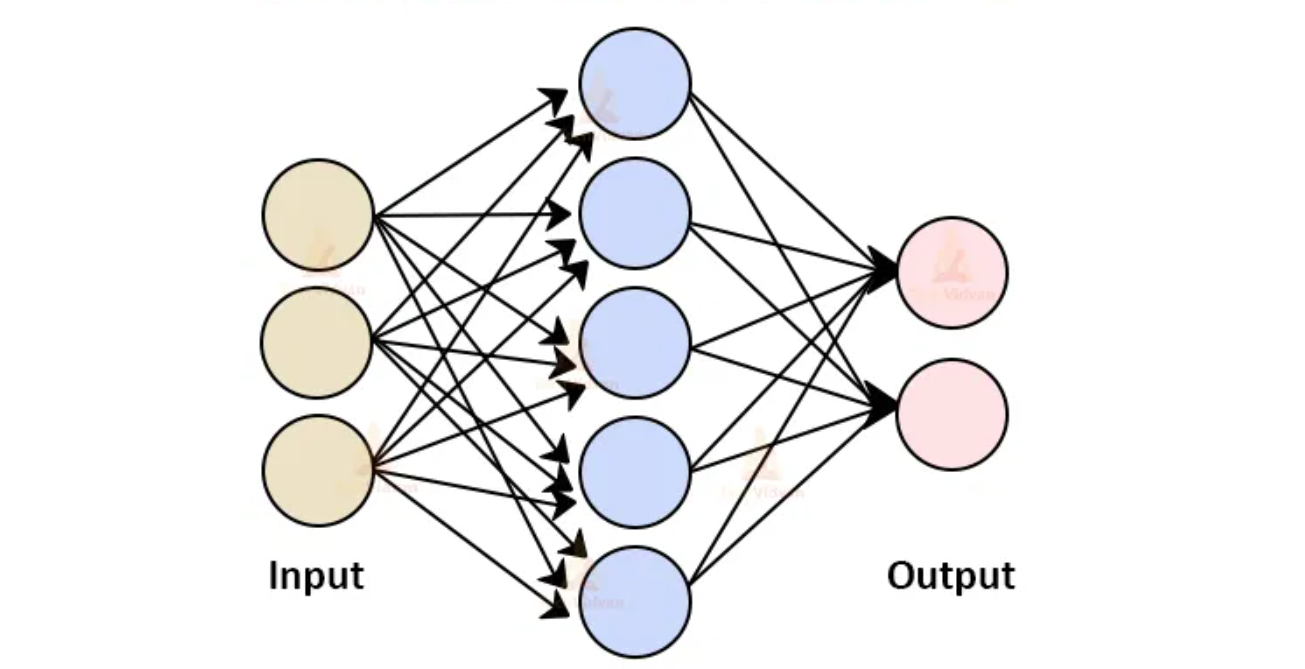

## Activation functions

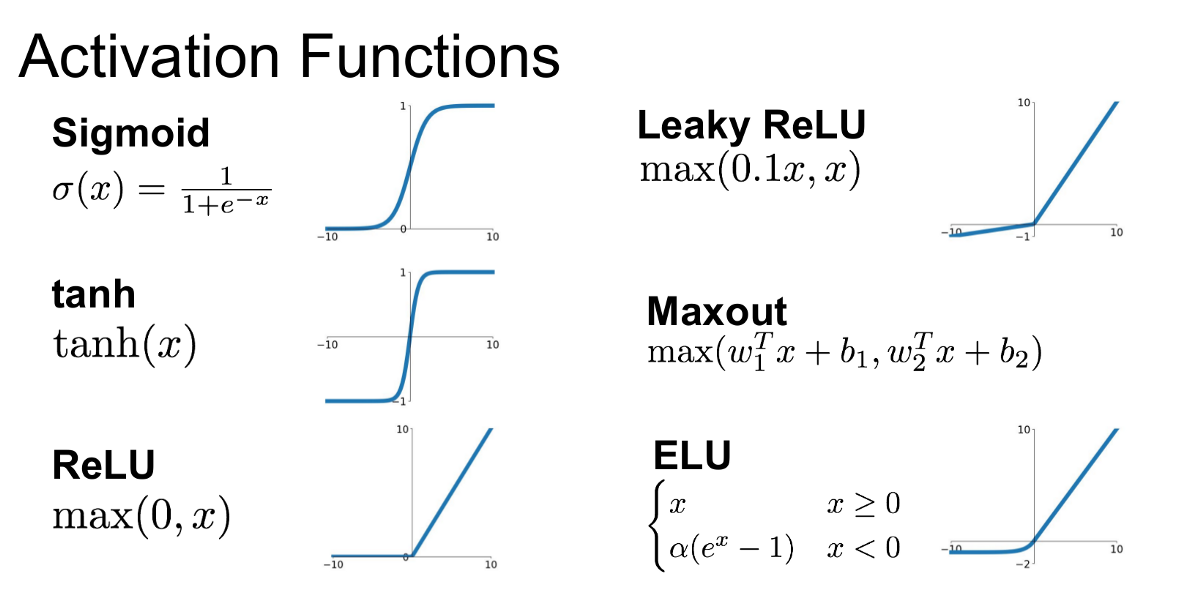

## Loss/Cost functions

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

 1. binary_crossentropy function
 2. categorical_crossentropy function
 3. sparse_categorical_crossentropy function
 4. mean_squared_error function
 5. mean_absolute_error function
 6. mean_absolute_percentage_error function
 7. mean_squared_logarithmic_error function

## Optimizers

1. SGD
2. RMSprop
3. Adam


# Sigmoid function - Derivative

C:\Users\91956\AppData\Local\Temp\ipykernel_16268\698742127.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


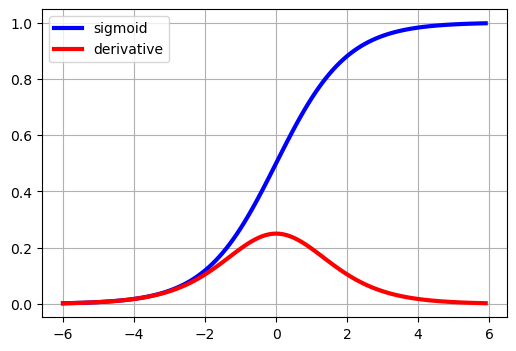

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
x=np.arange(-6,6,0.1)
#print(x)
#print(len(x))
#sigmoid(x)
# Create and show plot
fig, ax = plt.subplots(figsize=(6, 4))
plt.grid()
ax.plot(x,sigmoid(x)[0], color="blue", linewidth=3, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="red", linewidth=3, label="derivative")
ax.legend(loc="upper left")
fig.show()

## Observations
1. Derivate values are in between 0 and 0.3
2. Derivate values become non zero , if sigmoid values are in range -4 to 4 , otherwise it is zero

# tanh or Hyperbolic function - Derivative

C:\Users\91956\AppData\Local\Temp\ipykernel_16268\3368179348.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


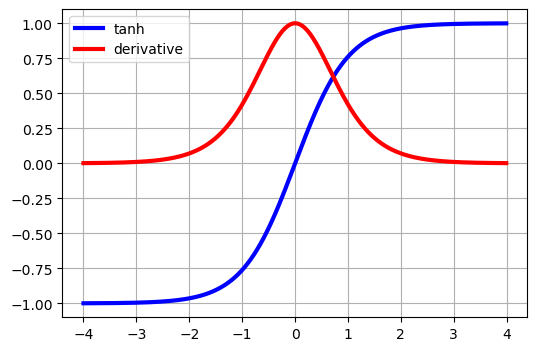

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

z=np.arange(-4,4,0.01)
# Create and show plot
fig, ax = plt.subplots(figsize=(6, 4))
plt.grid()
ax.plot(z,tanh(z)[0], color="blue", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="red", linewidth=3, label="derivative")
ax.legend(loc="upper left")
fig.show()

## Observations
1. Derivate values are in between 0 and 1
2. Derivate values become non zero , if tanh values are in range -3 to 3 , otherwise it is zero

# Vanishing gradient
As more layers using certain activation functions are added to neural networks, the gradients of the loss function approaches zero, making the network hard to train.

# 1.Import Python modules

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13487909493678159375
xla_global_id: -1
]


In [4]:
import tensorflow as tf
tf.__version__


'2.15.0'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# 2. Load Dataset - MNIST

In [6]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()
print("train data length:",len(X_train))
print("test data length:",len(X_test))

print(Y_train)

train data length: 60000
test data length: 10000
[5 0 4 ... 5 6 8]


# 3. Scaling

In [5]:
from tensorflow.keras.utils import to_categorical
Y_train_saved = Y_train
Y_test_saved = Y_test
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
print(Y_train.shape)
print(Y_test.shape)
# Normalize the features
X_train = X_train / 255
X_test = X_test / 255

# reashaping the 784 pixels into 28 x 28 matrix which represents the pixels of the actual image
# as input we will have an array of these matrices
X_train_scaled = X_train.reshape(X_train.shape[0],28*28)
X_test_scaled = X_test.reshape(X_test.shape[0],28*28)

(60000, 10)
(10000, 10)


# 4. Model

## 4.1 Very simple neural network with no hidden layers
- Optimizer -Adam,
- Final Activation - softmax

In [6]:
model_1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

model_1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy']
              )
model_1.summary()
#param_number = output_channel_number * (input_channel_number + 1)
history=model_1.fit(X_train_scaled, Y_train,validation_data=(X_test_scaled, Y_test), epochs=10)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


1875/1875 [==============================] - 2s 1ms/step - loss: 0.4719 - accuracy: 0.8773 - val_loss: 0.3084 - val_accuracy: 0.9145
Epoch 2/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.3033 - accuracy: 0.9154 - val_loss: 0.2843 - val_accuracy: 0.9201
Epoch 3/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.2833 - accuracy: 0.9213 - val_loss: 0.2752 - val_accuracy: 0.9229
Epoch 4/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.2731 - accuracy: 0.9235 - val_

In [7]:
model_1.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 0s 738us/step - loss: 0.2627 - accuracy: 0.9278


[0.262711763381958, 0.9277999997138977]

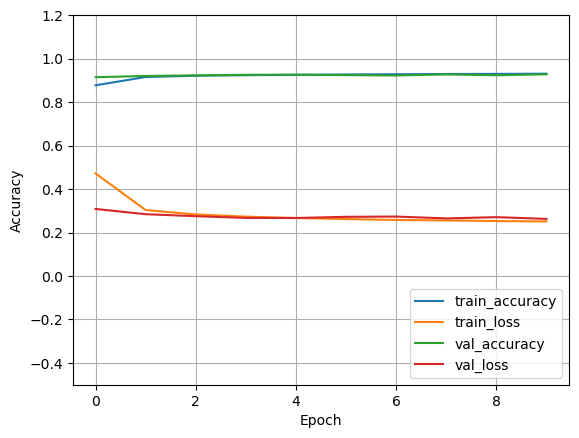

In [8]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.2 Using hidden layer - 
- Optimzer -Adam
- Final Activation -softmax

In [9]:
model_2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_2.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test),epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
Total params: 85390 (333.55 KB)
Trainable params: 85390 (333.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9204 - val_loss: 0.1425 - val_accuracy: 0.9579
Epoc

In [10]:
model_2.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 0s 822us/step - loss: 0.0960 - accuracy: 0.9774


[0.09595609456300735, 0.977400004863739]

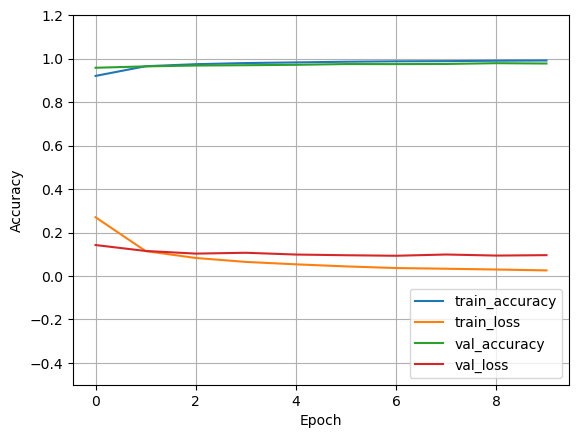

In [11]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.3 Using hidden layer . 
- Optimizer Adam,
- Final Activation Sigmoid 

In [12]:
model_3 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_3.fit(X_train_scaled, Y_train_saved, validation_data=(X_test_scaled, Y_test_saved),epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 85390 (333.55 KB)
Trainable params: 85390 (333.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2627 - accuracy: 0.9226 - val_loss: 0.1389 - val_accuracy: 0.9566
Epoc

In [13]:
model_3.evaluate(X_test_scaled, Y_test_saved)

313/313 [==============================] - 0s 839us/step - loss: 0.0861 - accuracy: 0.9750


[0.08613214641809464, 0.9750000238418579]

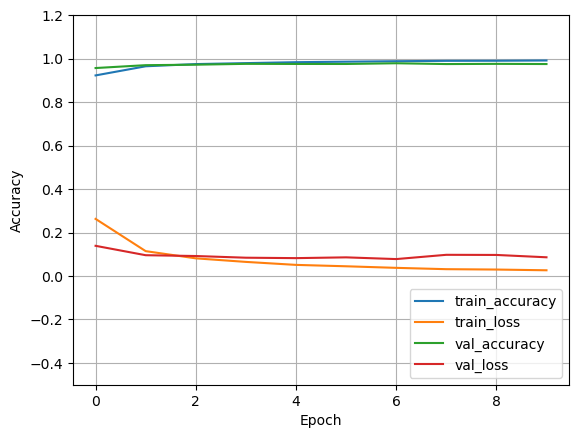

In [14]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.4 Using hidden layer - SGD,Softmax 

In [15]:
model_4 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_4.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_4.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test),epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 30)                1530      
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
Total params: 85390 (333.55 KB)
Trainable params: 85390 (333.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6738 - accuracy: 0.8073 - val_loss: 0.3157 - val_accuracy: 0.9063
Epoc

In [16]:
model_4.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 0s 884us/step - loss: 0.1158 - accuracy: 0.9646


[0.11584100127220154, 0.9646000266075134]

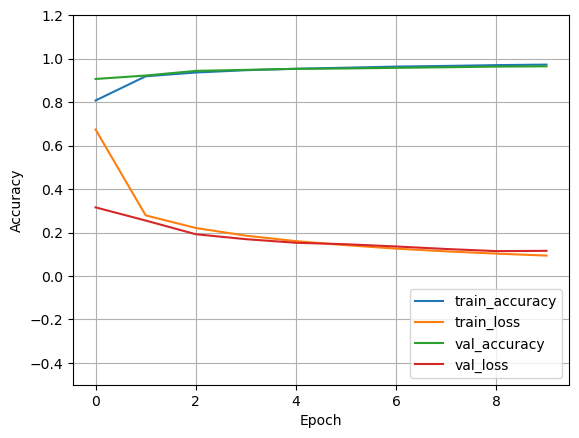

In [17]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.5 Using hidden layer 
- Optimizer -SGD
- Final Activation -Sigmoid 

In [18]:
model_5 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_5.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_5.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_5.fit(X_train_scaled, Y_train_saved, validation_data=(X_test_scaled, Y_test_saved),epochs=10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 30)                1530      
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
Total params: 85390 (333.55 KB)
Trainable params: 85390 (333.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6616 - accuracy: 0.8137 - val_loss: 0.3165 - val_accuracy: 0.9085
Epoc

In [19]:
model_5.evaluate(X_test_scaled, Y_test_saved)

313/313 [==============================] - 0s 821us/step - loss: 0.1073 - accuracy: 0.9660


[0.10732762515544891, 0.9660000205039978]

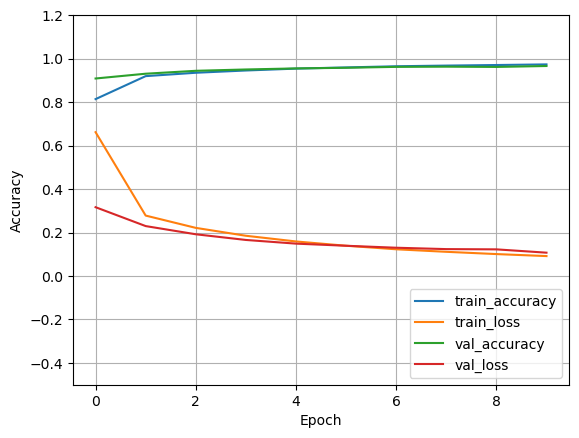

In [20]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

# 5.Performance Matrix

In [21]:
y_predicted = model_2.predict(X_test_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test_saved,predictions=y_predicted_labels)
cm

313/313 [==============================] - 0s 725us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    0,    1,    1,    4,    0,    2,    2],
       [   0, 1129,    3,    0,    0,    0,    2,    0,    1,    0],
       [   3,    2, 1017,    1,    1,    0,    2,    1,    4,    1],
       [   0,    1,    5,  979,    0,    4,    0,    8,    4,    9],
       [   1,    0,    3,    0,  954,    1,    8,    3,    0,   12],
       [   3,    0,    0,    7,    1,  872,    3,    0,    4,    2],
       [   4,    4,    0,    0,    1,    5,  943,    0,    0,    1],
       [   2,    6,   12,    0,    1,    0,    0,  989,    4,   14],
       [   2,    3,    6,    6,    7,    5,    2,    4,  936,    3],
       [   0,    2,    0,    2,    9,    3,    0,    4,    2,  987]])>

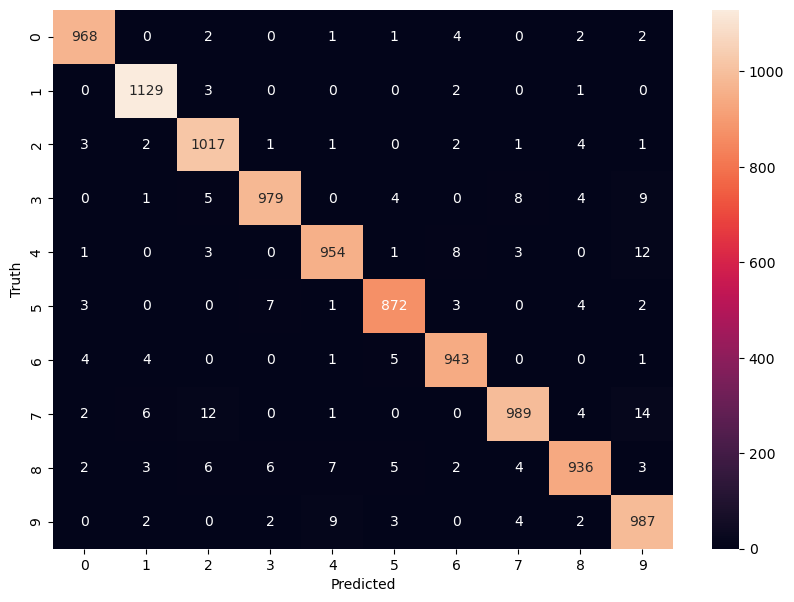

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# 6. Predict
1. Take one row of new set of values/image[not from exisitng] and Predict
2. Show as new feature prediction.

In [25]:
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28*28)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

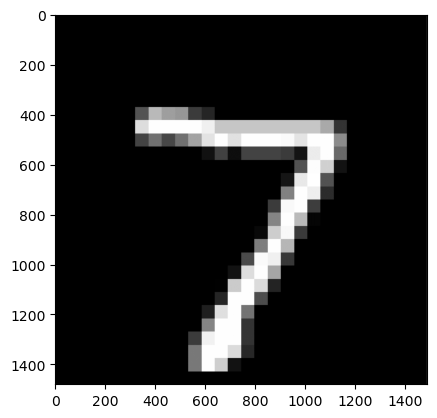

1/1 [==============================] - 0s 45ms/step
predict_value/digit: 7


C:\Users\91956\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [26]:
import matplotlib.image as mpimg
img = mpimg.imread("sample_image.png")
imgplot = plt.imshow(img)
plt.show()

img = load_image('sample_image.png')
predict_value = model_2.predict(img)
digit = np.argmax(predict_value)
print("predict_value/digit:",digit) 

# 7. Summary
1. Very simple neural network with no hidden layers  - accuray=92% (test and train) , Trainable params: 7,850.

2. Very simple neural network with hidden layer(100-50-30-10) - accuray=97%(test=99% and train=97%),Trainable params: 85,390

| Model Description                                    | Accuracy                 | Trainable Params |
|------------------------------------------------------|--------------------------|------------------|
| Very simple neural network with no hidden layers    | 92%                      | 7,850            |
| Very simple neural network with hidden layer (100-50-30-10) | 97% (test: 99%, train: 97%) | 85,390 |



# 8. Test & Submit

In [ ]:
import pandas as pd
new_test=pd.read_csv("../input/digit-recognizer/test.csv")
print(new_test.shape)
new_test = new_test / 255
y_predicted = model_2.predict(new_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

result=pd.DataFrame()
result["ImageId"]=[i for i in range(1,28001)]
result["Label"]=y_predicted_labels
result.to_csv('./submission.csv',index=False)

# 9. Not Covered in this notebook
1. Dropout layers , Batch Normalization(BN) - Regularization
2. Batch size - in model.fit
3. Hyper - Parameter tuning - Number of layers , activation functions(Relu,sigmoid,tanh), 
Optimizers(SGD, Adam)